In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_22.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_53.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_69.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_68.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_51.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_88.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_4.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_75.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_16.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_72.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_58.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

In [3]:
import os
import shutil

# Define paths for input data and output
input_path = "/kaggle/input/microorganism-image-classification/Micro_Organism"  # Correct path
output_path = "/kaggle/working/data"

# Define paths for train, val, test
train_path = os.path.join(output_path, "train")
val_path = os.path.join(output_path, "val")
test_path = os.path.join(output_path, "test")

# Create main directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Classes (update based on actual folders)
classes = ["Amoeba", "Euglena", "Hydra", "Paramecium", "Rod_bacteria", "Spherical_bacteria", "Spiral_bacteria", "Yeast"]

# Create class subfolders in train, val, test
for class_name in classes:
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

# Organize data
for class_name in classes:
    class_dir = os.path.join(input_path, class_name)

    if not os.path.exists(class_dir):
        print(f"Class directory '{class_name}' does not exist in {input_path}. Skipping...")
        continue

    images = os.listdir(class_dir)

    # Skip classes with less than 2 images
    if len(images) < 2:
        print(f"Skipping class '{class_name}' due to insufficient data.")
        continue

    for img in images:
        source = os.path.join(class_dir, img)
        destination = os.path.join(train_path, class_name, img)  # Customize splitting logic if needed
        shutil.copy(source, destination)

    print(f"Class '{class_name}' processed successfully.")



Class 'Amoeba' processed successfully.
Class 'Euglena' processed successfully.
Class 'Hydra' processed successfully.
Class 'Paramecium' processed successfully.
Class 'Rod_bacteria' processed successfully.
Class 'Spherical_bacteria' processed successfully.
Class 'Spiral_bacteria' processed successfully.
Class 'Yeast' processed successfully.


Classes found: ['Amoeba', 'Euglena', 'Spherical_bacteria', 'Hydra', 'Rod_bacteria', 'Spiral_bacteria', 'Paramecium', 'Yeast']


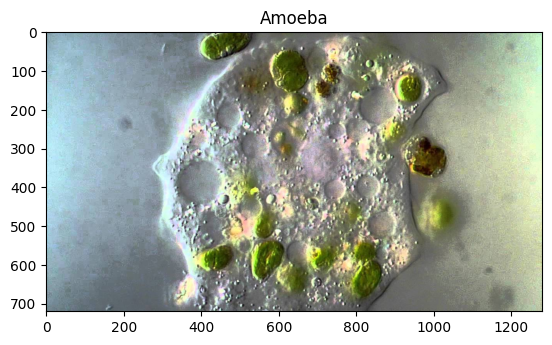

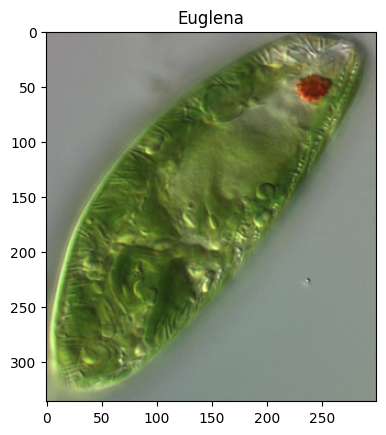

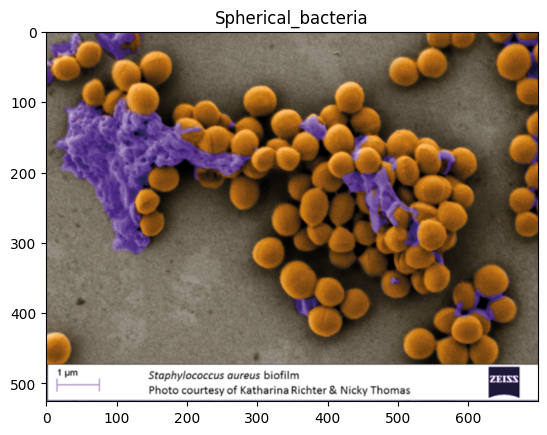

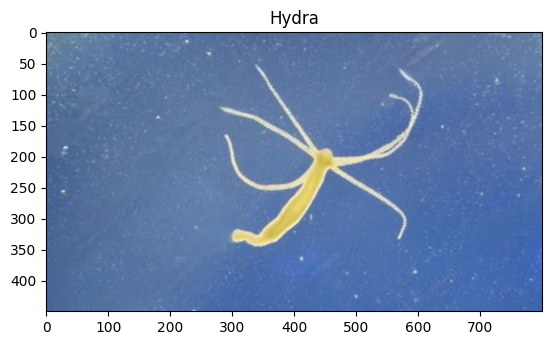

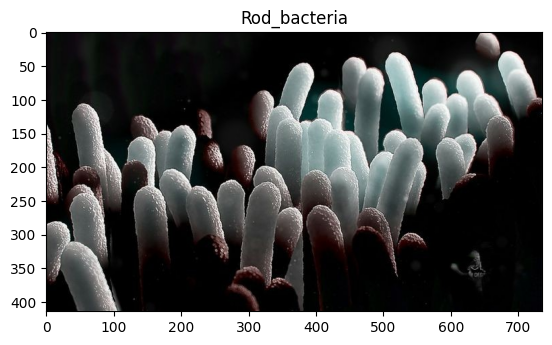

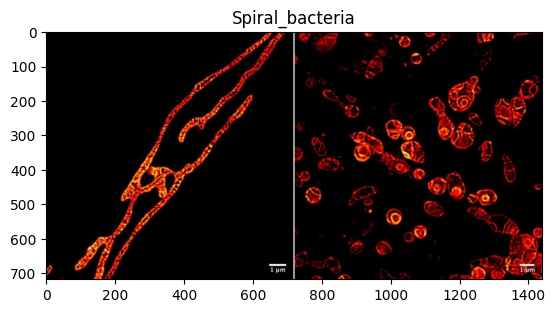

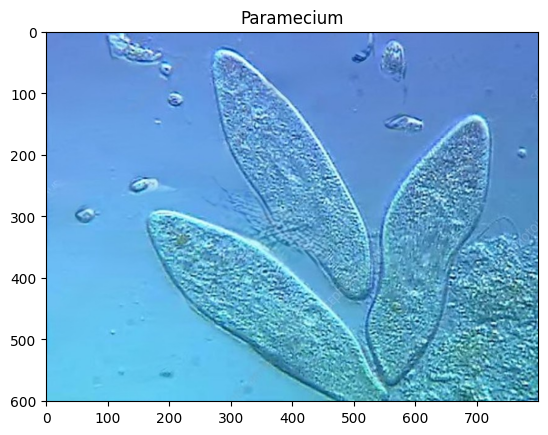

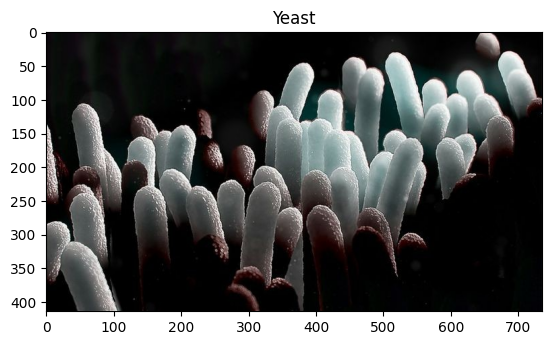

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "/kaggle/input/microorganism-image-classification/Micro_Organism"

# Visualize classes and check for structure
classes = os.listdir(dataset_path)
print(f"Classes found: {classes}")

# Example: Visualize a sample image from each class
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    sample_image = os.listdir(class_dir)[0]  # Take the first image
    img = Image.open(os.path.join(class_dir, sample_image))
    plt.imshow(img)
    plt.title(class_name)
    plt.show()


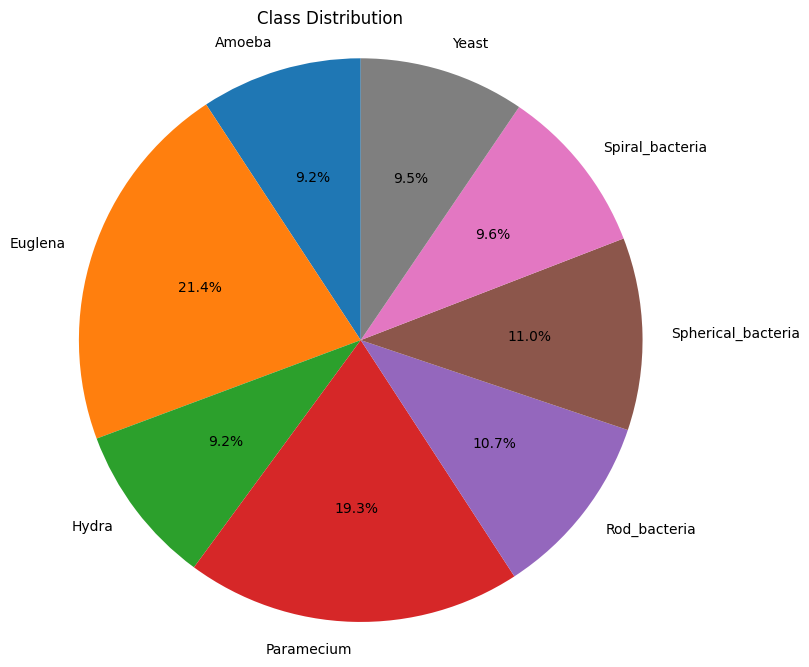

Amoeba: 72 images
Euglena: 167 images
Hydra: 72 images
Paramecium: 150 images
Rod_bacteria: 83 images
Spherical_bacteria: 86 images
Spiral_bacteria: 75 images
Yeast: 74 images


In [5]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset directory
dataset_path = '/kaggle/input/microorganism-image-classification/Micro_Organism'

# Define class names based on actual folders in the dataset
class_names = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Spherical_bacteria', 'Spiral_bacteria', 'Yeast']

# List to hold the distribution counts of each class
class_dis = []

# Count the number of images per class
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.exists(class_path):
        image_count = len([f for f in os.listdir(class_path) if f.endswith(('.tif', '.jpg', '.png', '.jpeg'))])
        class_dis.append(image_count)
    else:
        print(f"Class folder '{class_name}' not found. Skipping...")
        class_dis.append(0)

# Verify that class_dis contains valid counts
if sum(class_dis) == 0:
    print("No valid images found in the dataset. Please check the dataset structure and file extensions.")
else:
    # Create a pie chart using matplotlib
    plt.figure(figsize=(8, 8))
    plt.pie(class_dis, labels=class_names, autopct='%1.1f%%', startangle=90)
    plt.title("Class Distribution", x=0.45)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
    plt.show()

# Optional: Print counts for debugging
for class_name, count in zip(class_names, class_dis):
    print(f"{class_name}: {count} images")


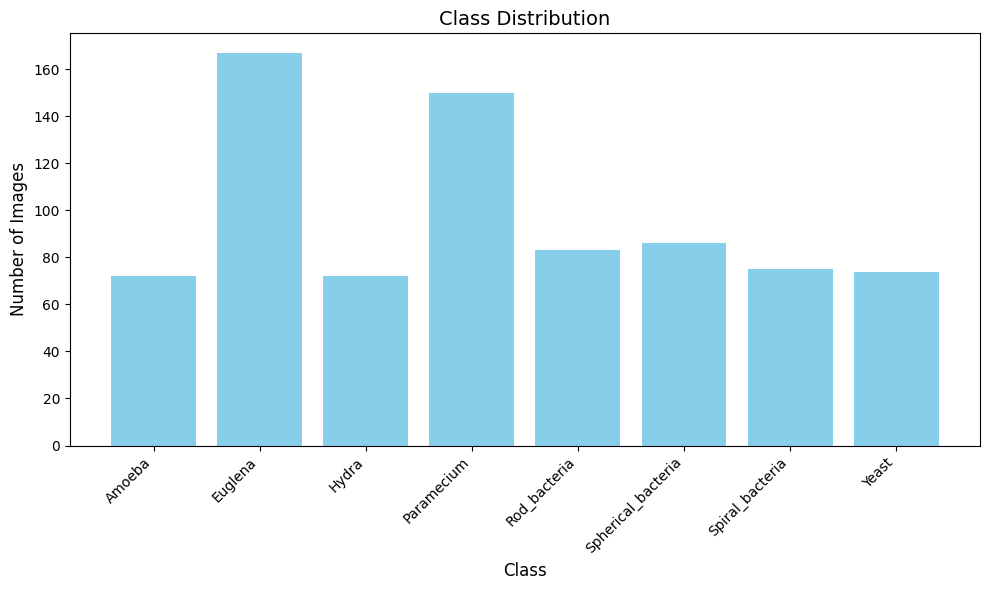

In [6]:
import matplotlib.pyplot as plt
import os

# Define the path to your dataset directory
dataset_path = '/kaggle/input/microorganism-image-classification/Micro_Organism'

# Define class names (directories)
class_names = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Spherical_bacteria', 'Spiral_bacteria', 'Yeast']

# List to hold the distribution counts of each class
class_dis = []

# Count the number of images per class
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    image_count = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))])  # Check for image files
    class_dis.append(image_count)

# Create a bar plot using matplotlib
plt.figure(figsize=(10,6))
plt.bar(class_names, class_dis, color='skyblue')

# Title and labels
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha="right")  # Rotate x labels for better visibility
plt.tight_layout()
plt.show()


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 3: Data Preprocessing (Normalization and Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation and test

# Set up the data generators
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Resizing the images to the input size of the model
    batch_size=32,
    class_mode='categorical'
)

val_data = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to avoid shuffling for final evaluation
)


Found 789 images belonging to 8 classes.
Found 0 images belonging to 8 classes.
Found 0 images belonging to 8 classes.


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to dataset directories
train_dir = "/kaggle/working/data/train"
val_dir = "/kaggle/working/data/val"
test_dir = "/kaggle/working/data/test"

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rescaling for validation and testing
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Data generators
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
val_data = val_test_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
test_data = val_test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False
)


Found 789 images belonging to 8 classes.
Found 116 images belonging to 8 classes.
Found 121 images belonging to 8 classes.


In [14]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Define directories
input_dir = "/kaggle/input/microorganism-image-classification/Micro_Organism"
train_dir = "/kaggle/working/data/train"
val_dir = "/kaggle/working/data/val"
test_dir = "/kaggle/working/data/test"

# Classes
classes = ["Amoeba", "Euglena", "Hydra", "Paramecium", "Rod_bacteria", "Spherical_bacteria", "Spiral_bacteria", "Yeast"]

# Valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.tif')

# Create directories
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)
    for cls in classes:
        os.makedirs(os.path.join(dir_path, cls), exist_ok=True)

# Split images
for cls in classes:
    class_dir = os.path.join(input_dir, cls)
    
    # Check if class directory exists
    if not os.path.exists(class_dir):
        print(f"Class directory '{cls}' does not exist. Skipping...")
        continue

    # Filter valid images
    images = [f for f in os.listdir(class_dir) if f.endswith(valid_extensions)]

    # Skip if not enough images
    if len(images) < 2:
        print(f"Skipping class '{cls}' due to insufficient data.")
        continue

    # Split data into train, validation, and test sets
    train, temp = train_test_split(images, test_size=0.3, random_state=42)
    val, test = train_test_split(temp, test_size=0.5, random_state=42)

    # Copy files to respective directories
    for img in train:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, cls, img))
    for img in val:
        shutil.copy(os.path.join(class_dir, img), os.path.join(val_dir, cls, img))
    for img in test:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, cls, img))

print("Dataset successfully split!")


Dataset successfully split!


In [16]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Path to manually downloaded weights
weights_path = '/kaggle/input/desneeeet/tensorflow2/default/1/densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load DenseNet201 with manual weights
base_model = DenseNet201(weights=weights_path, include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(8, activation='softmax')(x)  # Replace 8 with the number of classes in your dataset

# Build the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,337,352 (69.95 MB)

 Trainable params: 15,368 (60.03 KB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [10]:
#train the Model with Early Stopping

In [17]:
# Check train_data
for data_batch, labels_batch in train_data:
    print("Train batch shape:", data_batch.shape)
    print("Train labels shape:", labels_batch.shape)
    break

# Check val_data
for data_batch, labels_batch in val_data:
    print("Validation batch shape:", data_batch.shape)
    print("Validation labels shape:", labels_batch.shape)
    break


Train batch shape: (32, 224, 224, 3)
Train labels shape: (32, 8)
Validation batch shape: (32, 224, 224, 3)
Validation labels shape: (32, 8)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    "/kaggle/working/data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    "/kaggle/working/data/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Verify the data
for images, labels in train_data:
    print("Train images batch shape:", images.shape)
    print("Train labels batch shape:", labels.shape)
    break


Found 789 images belonging to 8 classes.
Found 116 images belonging to 8 classes.
Train images batch shape: (32, 224, 224, 3)
Train labels batch shape: (32, 8)


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stopping]
)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 171s 6s/step - accuracy: 0.1901 - loss: 2.5468 - val_accuracy: 0.4655 - val_loss: 1.5764
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.3968 - loss: 1.7745 - val_accuracy: 0.6034 - val_loss: 1.1448
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.5187 - loss: 1.4045 - val_accuracy: 0.6983 - val_loss: 0.9293
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.5787 - loss: 1.2472 - val_accuracy: 0.7414 - val_loss: 0.7907
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.5942 - loss: 1.1516 - val_accuracy: 0.7759 - val_loss: 0.7169
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.6655 - loss: 0.9831 - val_accuracy: 0.8190 - val_loss: 0.6271
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.7106 - loss: 0.8397 - val_accuracy: 0.8362 - val_loss: 0.5993
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.7317 - loss: 0.8197 - val_accuracy: 0.8621 - v

In [20]:
 # Fine-Tune the Model

In [21]:
# Unfreeze specific layers
base_model.trainable = True

# Freeze the first N layers (adjust N based on experimentation)
for layer in base_model.layers[:300]:  # Change 300 to the number of layers to freeze
    layer.trainable = False

# Recompile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 391s 12s/step - accuracy: 0.7119 - loss: 0.8931 - val_accuracy: 0.9224 - val_loss: 0.2335
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 295s 12s/step - accuracy: 0.8990 - loss: 0.2978 - val_accuracy: 0.9828 - val_loss: 0.0702
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 294s 12s/step - accuracy: 0.9514 - loss: 0.1620 - val_accuracy: 0.9914 - val_loss: 0.0837
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 297s 12s/step - accuracy: 0.9427 - loss: 0.1774 - val_accuracy: 0.9914 - val_loss: 0.0239
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 299s 12s/step - accuracy: 0.9811 - loss: 0.0657 - val_accuracy: 1.0000 - val_loss: 0.0119
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 292s 12s/step - accuracy: 0.9702 - loss: 0.0859 - val_accuracy: 0.9914 - val_loss: 0.0154
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 292s 12s/step - accuracy: 0.9761 - loss: 0.0616 - val_accuracy: 0.9828 - val_loss: 0.0246
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 290s 12s/step - accuracy: 0.9898 - loss: 0.0508 - val_accuracy: 1.

In [22]:

# Visualize Accuracy and Loss Curves

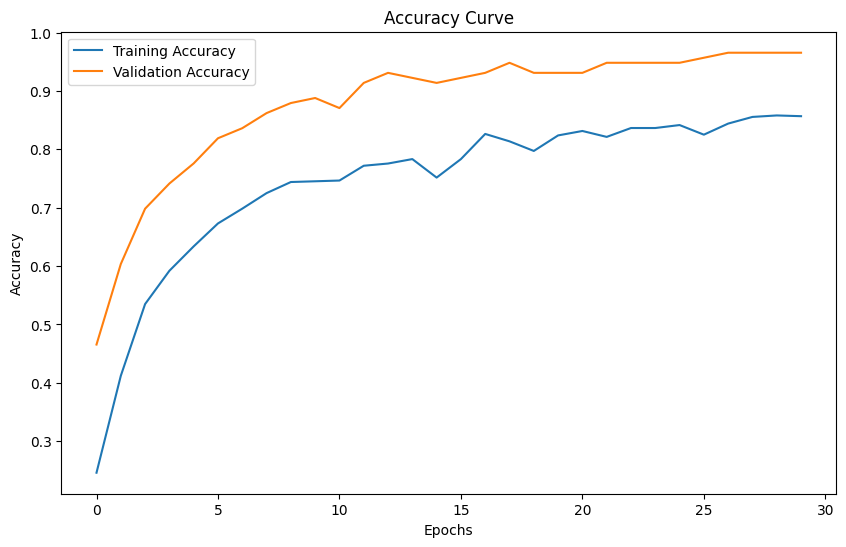

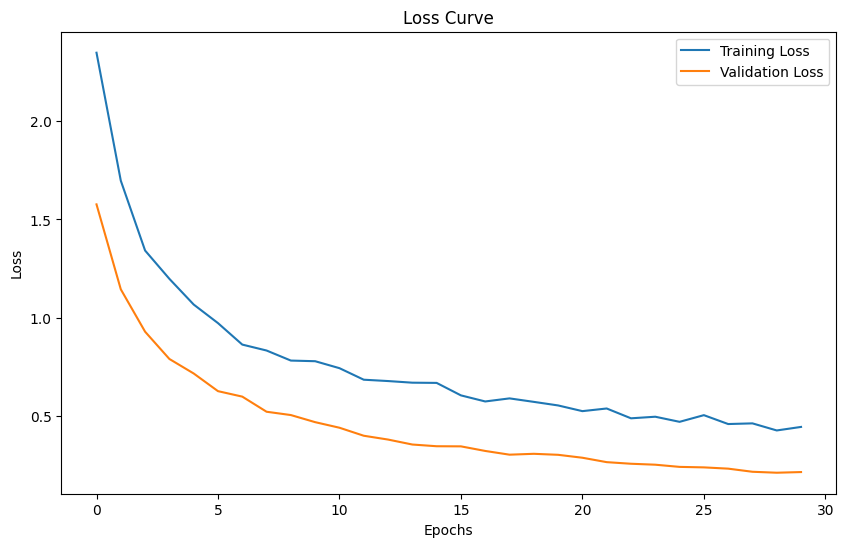

In [23]:
import matplotlib.pyplot as plt

# Accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
# Generate and Visualize the Confusion Matrix

4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step


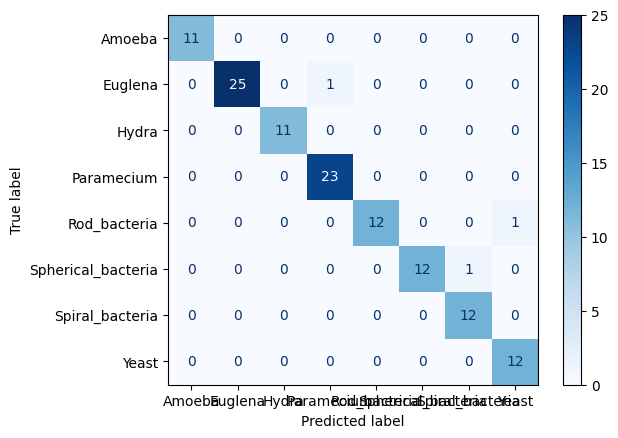

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [26]:
 # Display Precision, Recall, and F1-Score

In [27]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys(), digits=4)
print("Classification Report:")
print(report)


Classification Report:
                    precision    recall  f1-score   support

            Amoeba     1.0000    1.0000    1.0000        11
           Euglena     1.0000    0.9615    0.9804        26
             Hydra     1.0000    1.0000    1.0000        11
        Paramecium     0.9583    1.0000    0.9787        23
      Rod_bacteria     1.0000    0.9231    0.9600        13
Spherical_bacteria     1.0000    0.9231    0.9600        13
   Spiral_bacteria     0.9231    1.0000    0.9600        12
             Yeast     0.9231    1.0000    0.9600        12

          accuracy                         0.9752       121
         macro avg     0.9756    0.9760    0.9749       121
      weighted avg     0.9768    0.9752    0.9752       121



In [28]:
# Plot ROC and AUC Curves for Each Class

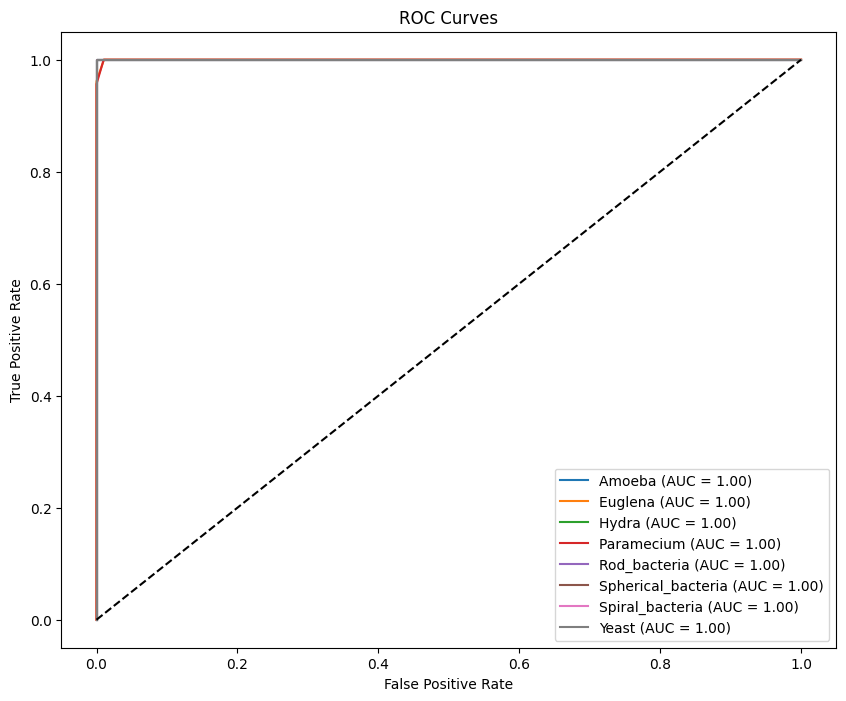

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_true_bin = label_binarize(y_true, classes=range(len(test_data.class_indices)))
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))

for i, class_name in enumerate(test_data.class_indices.keys()):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{class_name} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()


In [30]:
# Predict Single Images

In [31]:
from tensorflow.keras.preprocessing import image

def predict_single_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    pred_probs = model.predict(img_array)
    pred_class = np.argmax(pred_probs)
    
    return pred_class, test_data.class_indices.keys()

# Predict a single image
img_path = '/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_17.jpg'  # Update with an image path
predicted_class, class_names = predict_single_image(img_path, model)
print(f"Predicted Class: {list(class_names)[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted Class: Amoeba


In [32]:
# Predict a single image
img_path = '/kaggle/input/microorganism-image-classification/Micro_Organism/Spiral_bacteria/Image_23.jpg'  # Update with an image path
predicted_class, class_names = predict_single_image(img_path, model)
print(f"Predicted Class: {list(class_names)[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted Class: Spiral_bacteria


In [33]:
# Predict a single image
img_path = '/kaggle/input/microorganism-image-classification/Micro_Organism/Yeast/Image_22.jpg'  # Update with an image path
predicted_class, class_names = predict_single_image(img_path, model)
print(f"Predicted Class: {list(class_names)[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Predicted Class: Yeast


In [34]:
# Predict a single image
img_path = '/kaggle/input/microorganism-image-classification/Micro_Organism/Hydra/Image_131.jpg'  # Update with an image path
predicted_class, class_names = predict_single_image(img_path, model)
print(f"Predicted Class: {list(class_names)[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted Class: Hydra


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted Class: Rod_bacteria, Confidence: 99.93%


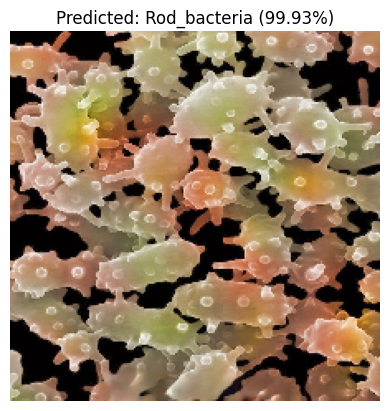

In [36]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to predict an image
def predict_image(img_path, model, class_names):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Update for DenseNet input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale pixel values

    # Predict using the model
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    # Display the image and prediction
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%")
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# Example Usage
# Ensure class_names matches the order of train_data.class_indices
class_names = list(train_data.class_indices.keys())

# Provide the path to an example image from your dataset
example_img_path = "/kaggle/input/microorganism-image-classification/Micro_Organism/Rod_bacteria/Image_24.jpg"
predict_image(example_img_path, model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted Class: Hydra, Confidence: 100.00%


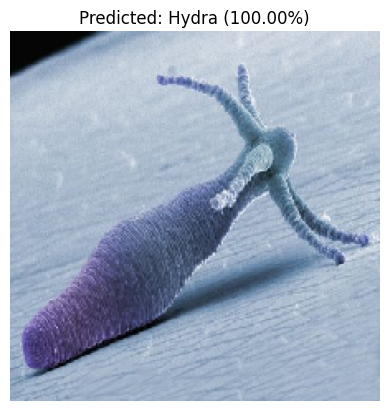

In [38]:
example_img_path = "/kaggle/input/microorganism-image-classification/Micro_Organism/Hydra/Image_108.jpg"
predict_image(example_img_path, model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Predicted Class: Spiral_bacteria, Confidence: 99.99%


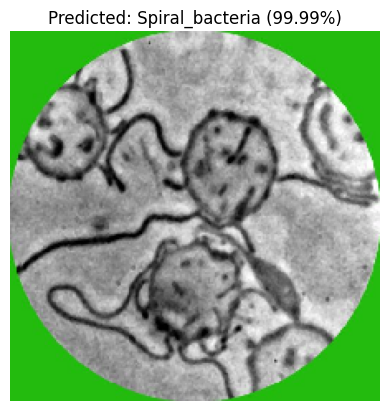

In [39]:
example_img_path = "/kaggle/input/microorganism-image-classification/Micro_Organism/Spiral_bacteria/Image_15.jpg"
predict_image(example_img_path, model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Predicted Class: Paramecium, Confidence: 85.64%


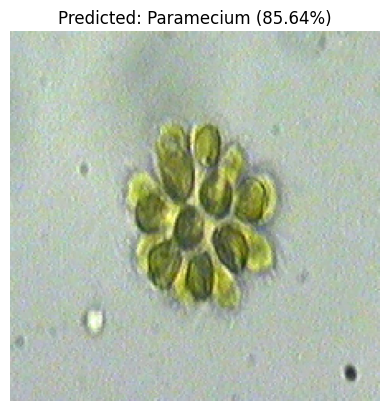

In [40]:
example_img_path = "/kaggle/input/microorganism-image-classification/Micro_Organism/Euglena/Image_11.jpg"
predict_image(example_img_path, model, class_names)
